In [6]:
import pandas as pd
df = pd.read_csv('data/units.csv')

C:\Users\Alex\AppData\Local\Temp\ipykernel_48712\2737293054.py:2: DtypeWarning: Columns (3,4,7,10,12,13,16,18,19,22,23,25,26,29,36,38,39,41,42,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/units.csv')


In [7]:
# List of column names to drop
columns_to_drop = [col for col in df.columns if col.endswith('_ar')]

# Drop these columns
df.drop(columns=columns_to_drop, inplace=True)

# Show the updated DataFrame
print(df.head())

   property_id  area_id  zone_id      area_name_en  land_number  \
0   1300000003    351.0      2.0  Al Thanyah Third         31.0   
1   1300000004    351.0      2.0  Al Thanyah Third         34.0   
2   1300000005    351.0      2.0  Al Thanyah Third         34.0   
3   1300000006    351.0      2.0  Al Thanyah Third         34.0   
4   1300000007    351.0      2.0  Al Thanyah Third         34.0   

   land_sub_number building_number unit_number  unit_balcony_area  \
0              0.0               2         207              19.97   
1              0.0               1         G01              13.22   
2              0.0               1         G02              96.20   
3              0.0               1         G03             106.46   
4              0.0               1         G04              29.10   

  unit_parking_number  ...  is_free_hold is_lease_hold  is_registered  \
0         B-63 , B-64  ...           1.0           0.0            1.0   
1                B-27  ...          

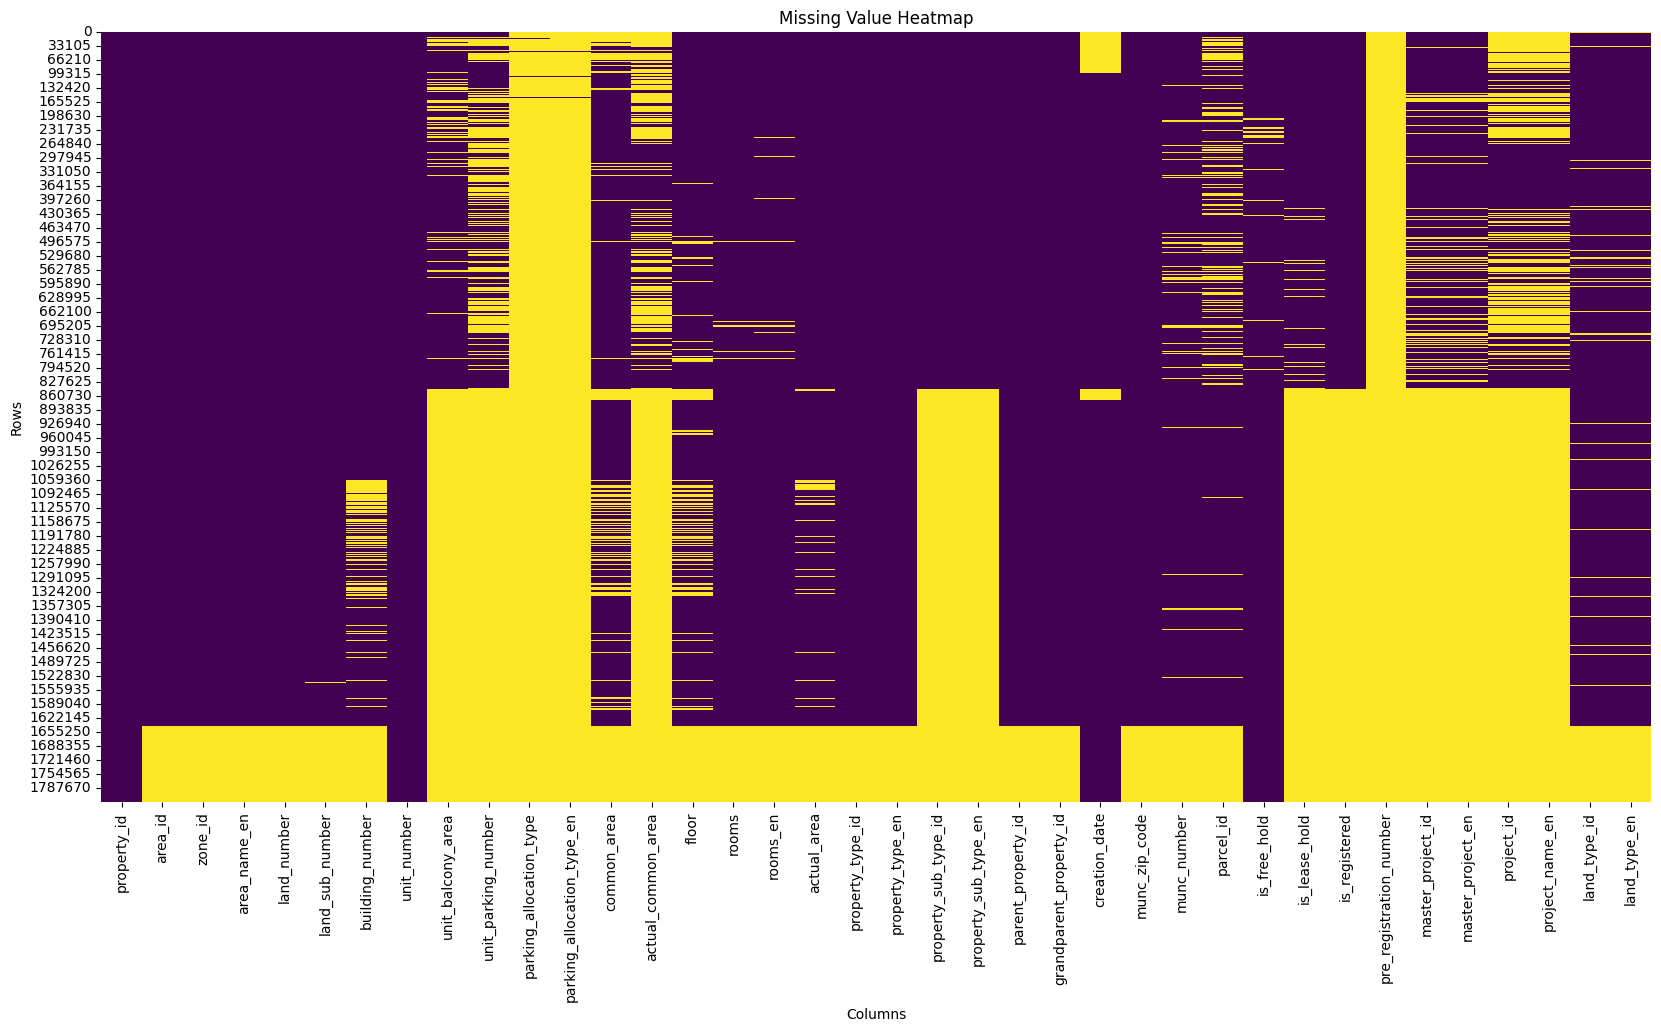

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your DataFrame
# df = pd.read_csv('data/Land_Registry.csv')

# Initialize plot
plt.figure(figsize=(20, 10))

# Create a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

# Add title and labels
plt.title('Missing Value Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Show the plot
plt.show()


In [9]:
# let's focus only on flats. we choose Flat from property_sub_type_en
df = df[df['property_sub_type_en'] == 'Flat']

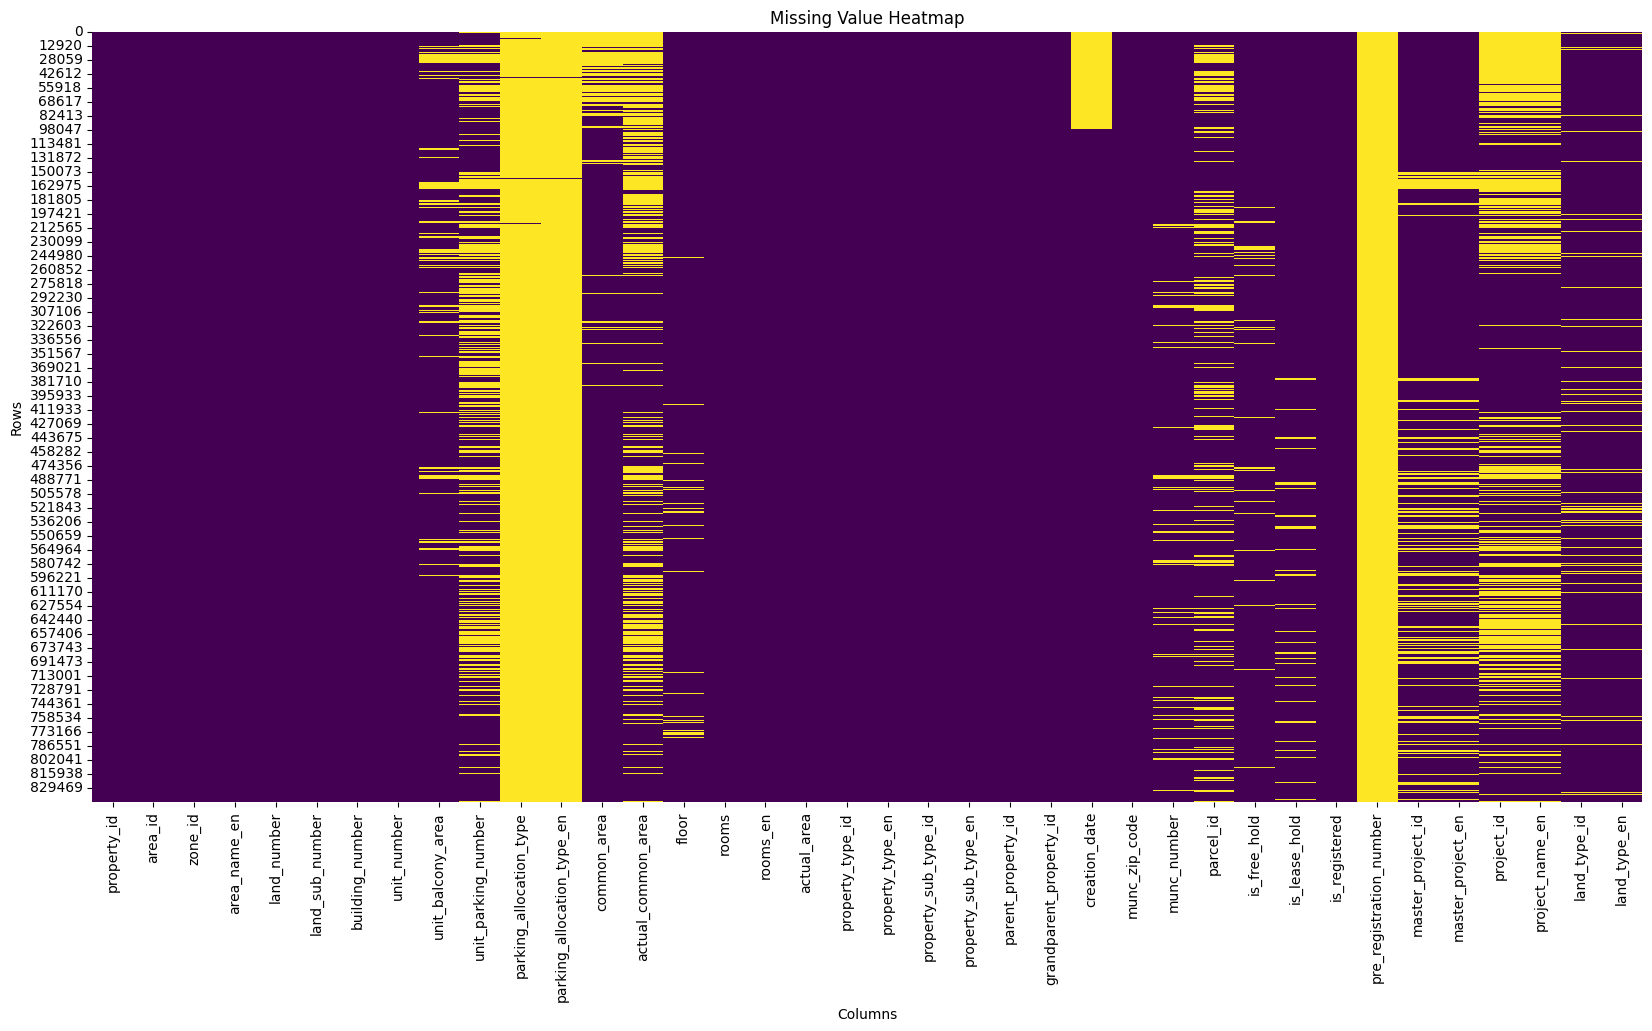

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your DataFrame
# df = pd.read_csv('data/Land_Registry.csv')

# Initialize plot
plt.figure(figsize=(20, 10))

# Create a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

# Add title and labels
plt.title('Missing Value Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Show the plot
plt.show()


In [11]:
# we can completely delete the parking_allocation_type column together with the parking_allocation_type_en and pre_registration_number columns
df = df.drop(['parking_allocation_type', 'parking_allocation_type_en', 'pre_registration_number'], axis=1)

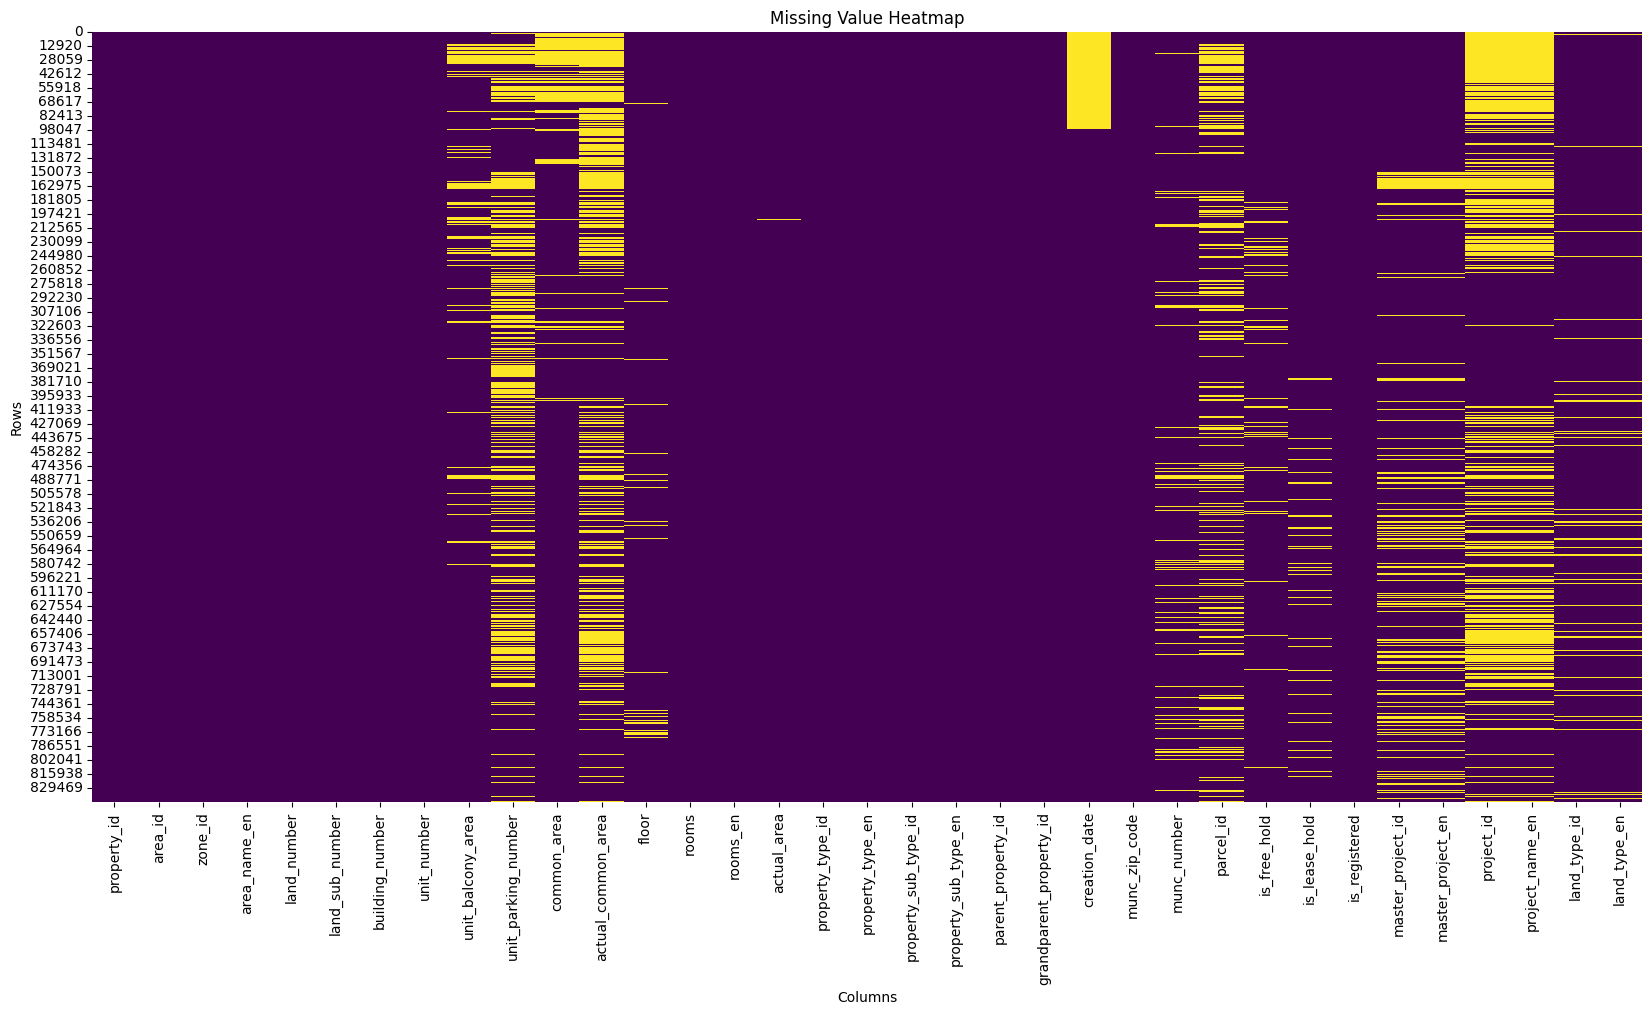

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your DataFrame
# df = pd.read_csv('data/Land_Registry.csv')

# Initialize plot
plt.figure(figsize=(20, 10))

# Create a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

# Add title and labels
plt.title('Missing Value Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Show the plot
plt.show()


In [13]:
# comparing unique property_id with amount of rows
df['property_id'].nunique()


691345

In [14]:
df.shape

(691345, 35)

In [15]:
print(df)


        property_id  area_id  zone_id      area_name_en  land_number  \
0        1300000003    351.0      2.0  Al Thanyah Third         31.0   
1        1300000004    351.0      2.0  Al Thanyah Third         34.0   
2        1300000005    351.0      2.0  Al Thanyah Third         34.0   
3        1300000006    351.0      2.0  Al Thanyah Third         34.0   
4        1300000007    351.0      2.0  Al Thanyah Third         34.0   
...             ...      ...      ...               ...          ...   
845170   1301230336    484.0      2.0        Nadd Hessa        665.0   
845171   1301230337    484.0      2.0        Nadd Hessa        665.0   
845172   1301230338    484.0      2.0        Nadd Hessa        665.0   
845173   1301230339    484.0      2.0        Nadd Hessa        665.0   
845174   1301230340    484.0      2.0        Nadd Hessa        665.0   

        land_sub_number building_number unit_number  unit_balcony_area  \
0                   0.0               2         207          

## Cleaning parking lots

In [16]:
# Step 1: Handle Missing Values for 'unit_parking_number'
# Replace NaNs with a '0' string to indicate no parking lots
df['unit_parking_number'].fillna('0', inplace=True)

# Step 2: Create New Column for Number of Parking Lots
# Count the parking lots by splitting the string by ','
df['num_parking_lots'] = df['unit_parking_number'].apply(lambda x: len(x.split(',')) if x != '0' else 0)

print("DataFrame with new 'num_parking_lots' column:")
print(df)

DataFrame with new 'num_parking_lots' column:
        property_id  area_id  zone_id      area_name_en  land_number  \
0        1300000003    351.0      2.0  Al Thanyah Third         31.0   
1        1300000004    351.0      2.0  Al Thanyah Third         34.0   
2        1300000005    351.0      2.0  Al Thanyah Third         34.0   
3        1300000006    351.0      2.0  Al Thanyah Third         34.0   
4        1300000007    351.0      2.0  Al Thanyah Third         34.0   
...             ...      ...      ...               ...          ...   
845170   1301230336    484.0      2.0        Nadd Hessa        665.0   
845171   1301230337    484.0      2.0        Nadd Hessa        665.0   
845172   1301230338    484.0      2.0        Nadd Hessa        665.0   
845173   1301230339    484.0      2.0        Nadd Hessa        665.0   
845174   1301230340    484.0      2.0        Nadd Hessa        665.0   

        land_sub_number building_number unit_number  unit_balcony_area  \
0              

In [17]:
# print every unique value in the column
df['num_parking_lots'].unique()

array([ 2,  1,  0,  3,  4,  6,  5, 18, 24, 22, 32, 15,  7,  9, 12, 11,  8,
       10], dtype=int64)

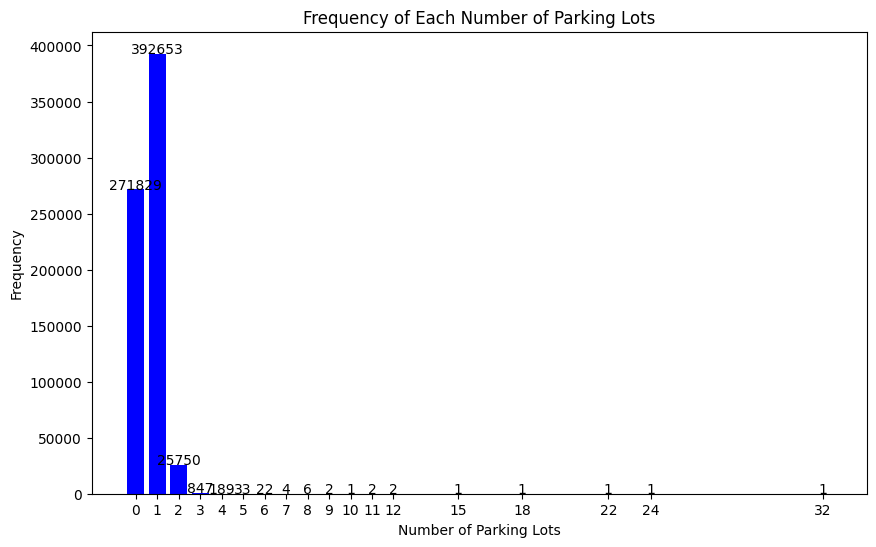

In [18]:
# Count occurrences of each unique value in 'num_parking_lots'
value_counts = df['num_parking_lots'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values, color='blue')
plt.xlabel('Number of Parking Lots')
plt.ylabel('Frequency')
plt.title('Frequency of Each Number of Parking Lots')
plt.xticks(value_counts.index)

# Adding text labels above the bars
for i, v in enumerate(value_counts.values):
    plt.text(value_counts.index[i], v + 0.1, str(v), ha='center')

plt.show()

## Rooms

In [19]:
df['rooms'].unique()

array([ 3.,  2.,  4., 45.,  5.,  1.,  0., 34., 26., 22., 49.,  8.,  6.,
       65., 58.,  7., 61.,  9., 10., nan, -1.])

In [20]:
df['rooms_en'].unique()

array(['3 B/R', '2 B/R', '4 B/R', 'Shop', '5 B/R', '1 B/R', nan, '1',
       'Studio', 'PENTHOUSE', 'GYM', '8 B/R', '6 B/R', 'Single Room',
       'Office', '7 B/R', 'Store Room', '9 B/R', '10 B/R'], dtype=object)

In [21]:
# delete all rows with rooms_en == 'Shop', 'Gym', 'Office'
df = df[df['rooms_en'] != 'Shop']
df = df[df['rooms_en'] != 'Gym']
df = df[df['rooms_en'] != 'Office']
df = df[df['rooms_en'] != 'Store Room']


# Drop rows with 'NaN' values in 'rooms_en'
df.dropna(subset=['rooms_en'], inplace=True)

# Filter out rows with '1' in 'rooms_en'
df = df[df['rooms_en'] != '1']

print(df)

        property_id  area_id  zone_id      area_name_en  land_number  \
0        1300000003    351.0      2.0  Al Thanyah Third         31.0   
1        1300000004    351.0      2.0  Al Thanyah Third         34.0   
2        1300000005    351.0      2.0  Al Thanyah Third         34.0   
3        1300000006    351.0      2.0  Al Thanyah Third         34.0   
4        1300000007    351.0      2.0  Al Thanyah Third         34.0   
...             ...      ...      ...               ...          ...   
845169   1301230335    484.0      2.0        Nadd Hessa        665.0   
845170   1301230336    484.0      2.0        Nadd Hessa        665.0   
845171   1301230337    484.0      2.0        Nadd Hessa        665.0   
845172   1301230338    484.0      2.0        Nadd Hessa        665.0   
845173   1301230339    484.0      2.0        Nadd Hessa        665.0   

        land_sub_number building_number unit_number  unit_balcony_area  \
0                   0.0               2         207          

In [22]:
df['rooms'].unique()

array([ 3.,  2.,  4.,  5.,  1., 26., 22., 49.,  8.,  6., 65.,  7.,  9.,
       10.])

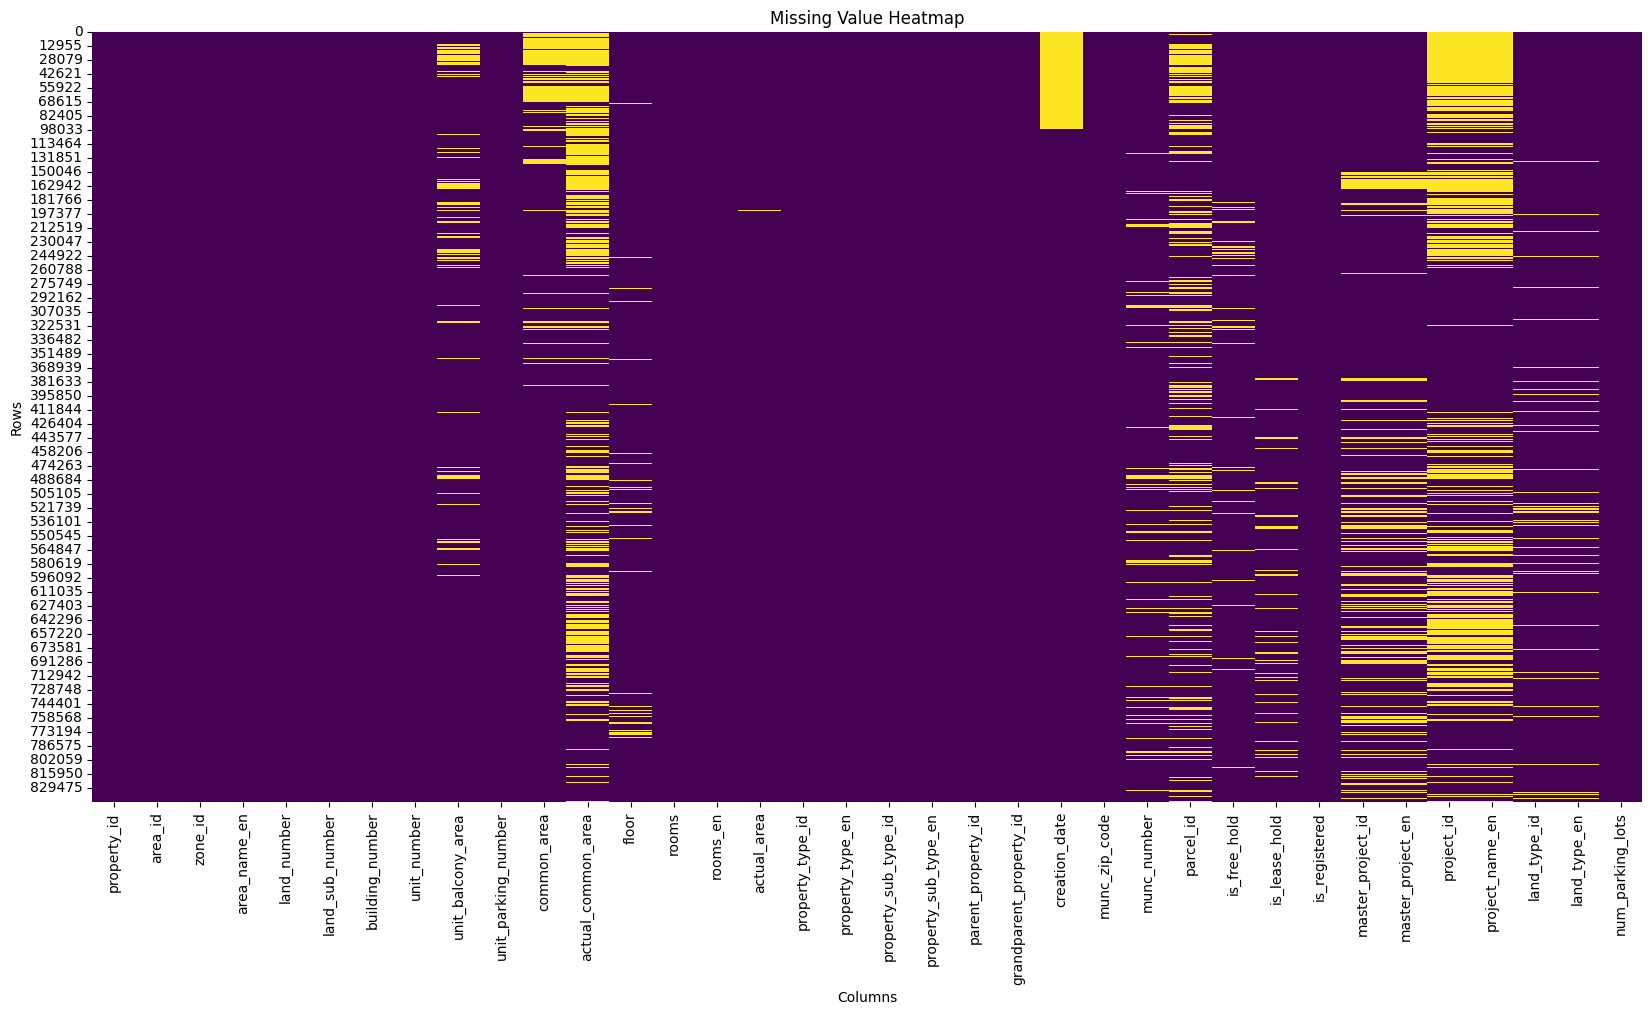

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your DataFrame
# df = pd.read_csv('data/Land_Registry.csv')

# Initialize plot
plt.figure(figsize=(20, 10))

# Create a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

# Add title and labels
plt.title('Missing Value Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Show the plot
plt.show()


In [24]:
# remove rooms column
df = df.drop(['rooms'], axis=1)

## Floor cleaning

In [25]:
# let's print out all unique values in floor column
df['floor'].unique()

array(['2', 'G', '1', '3', '4', '5', '6', '8', '26', '40', '41', '42',
       '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53',
       '25', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', 'UP01', '7', '9', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', 'UP',
       'G1', 'L', 'UP02', 'UP03', 'UP04', 'UP05', 'UP06', 'U', 'LP03',
       'UP07', 'UP08', 'LP', 'LP1', 'LP2', 'UP1', 'UP2', 'LP01', 'LP02',
       'P', 'LP04', 'M', 'UPO2', 'UP09', 'UP10', 'UP11', 'UP12', 'LG,G',
       '1,2', 'B1', ' 1', ' 2', ' 3', ' 4', 'LO3', '05', '06', '02', '03',
       '04', '07', '08', '09', 'A2', 'B2', 'A', 'B', 'A3', 'B3', 'A1',
       'G0', 'L1', 'L2', 'L4', 'L3', ' G', '80', '81', '82', '83', '84',
       '85', '86', '54', '55', '56', '60', '61', '78', '79', '57', '58',
       '59', '62', '63', '76', '77', ' 5', '70', '71', '64', '65', '72',
       '66', '67', '68', '91', '92', '97', '98', '99', 

In [26]:
# Assuming you have a DataFrame called df with a 'floor' column
# Convert 'floor' to string first, as it seems to have mixed types
df['floor'] = df['floor'].astype(str)

# Rule 1: Every floor where it's >100 we just take the 1st number as a floor
is_numeric = pd.to_numeric(df['floor'], errors='coerce').notna()
df.loc[is_numeric & (df.loc[is_numeric, 'floor'].astype(int) > 100), 'floor'] = df['floor'].str[0]

# Rule 2: Any string that contains 'g' or 'G' letter will be considered a 0 floor
df.loc[df['floor'].str.contains('g|G', case=False, na=False), 'floor'] = '0'

# Rule 3: 1st number after letter T and B will be considered a floor number
df.loc[df['floor'].str.contains('t|T', na=False), 'floor'] = df['floor'].str.extract('(?i)t(\d)')[0]
df.loc[df['floor'].str.contains('b|B', na=False), 'floor'] = df['floor'].str.extract('(?i)b(\d)')[0]

# Rule 4: Only numbers before 'th' and 'st' and 'rd'
df.loc[df['floor'].str.contains('th|st|rd', case=False, na=False), 'floor'] = df['floor'].str.extract('(\d+)(?:th|st|rd)')[0]

# Rule 5: Everything starts with 0 will be 0 floor
df.loc[df['floor'].str.startswith('0', na=False), 'floor'] = '0'

# After all the operations, convert the floor to integers
df['floor'] = pd.to_numeric(df['floor'], errors='coerce').fillna(0).astype(int)

# Show the DataFrame
print(df)


        property_id  area_id  zone_id      area_name_en  land_number  \
0        1300000003    351.0      2.0  Al Thanyah Third         31.0   
1        1300000004    351.0      2.0  Al Thanyah Third         34.0   
2        1300000005    351.0      2.0  Al Thanyah Third         34.0   
3        1300000006    351.0      2.0  Al Thanyah Third         34.0   
4        1300000007    351.0      2.0  Al Thanyah Third         34.0   
...             ...      ...      ...               ...          ...   
845169   1301230335    484.0      2.0        Nadd Hessa        665.0   
845170   1301230336    484.0      2.0        Nadd Hessa        665.0   
845171   1301230337    484.0      2.0        Nadd Hessa        665.0   
845172   1301230338    484.0      2.0        Nadd Hessa        665.0   
845173   1301230339    484.0      2.0        Nadd Hessa        665.0   

        land_sub_number building_number unit_number  unit_balcony_area  \
0                   0.0               2         207          

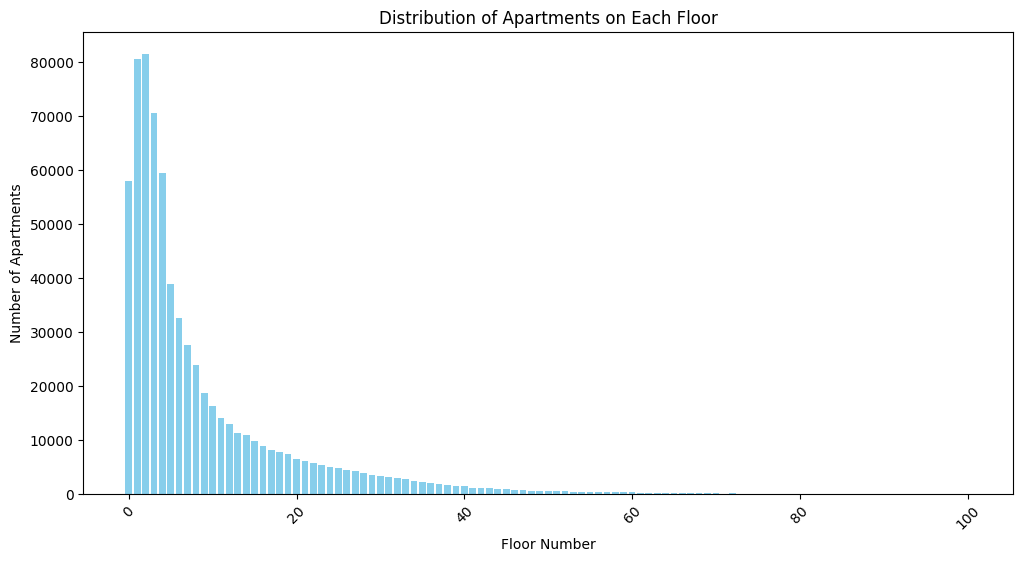

In [27]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'floor' is the column of interest
# Count the number of apartments on each floor
floor_count = df['floor'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(floor_count.index, floor_count.values, color='skyblue')

plt.xlabel('Floor Number')
plt.ylabel('Number of Apartments')
plt.title('Distribution of Apartments on Each Floor')
plt.xticks(rotation=45)
plt.show()


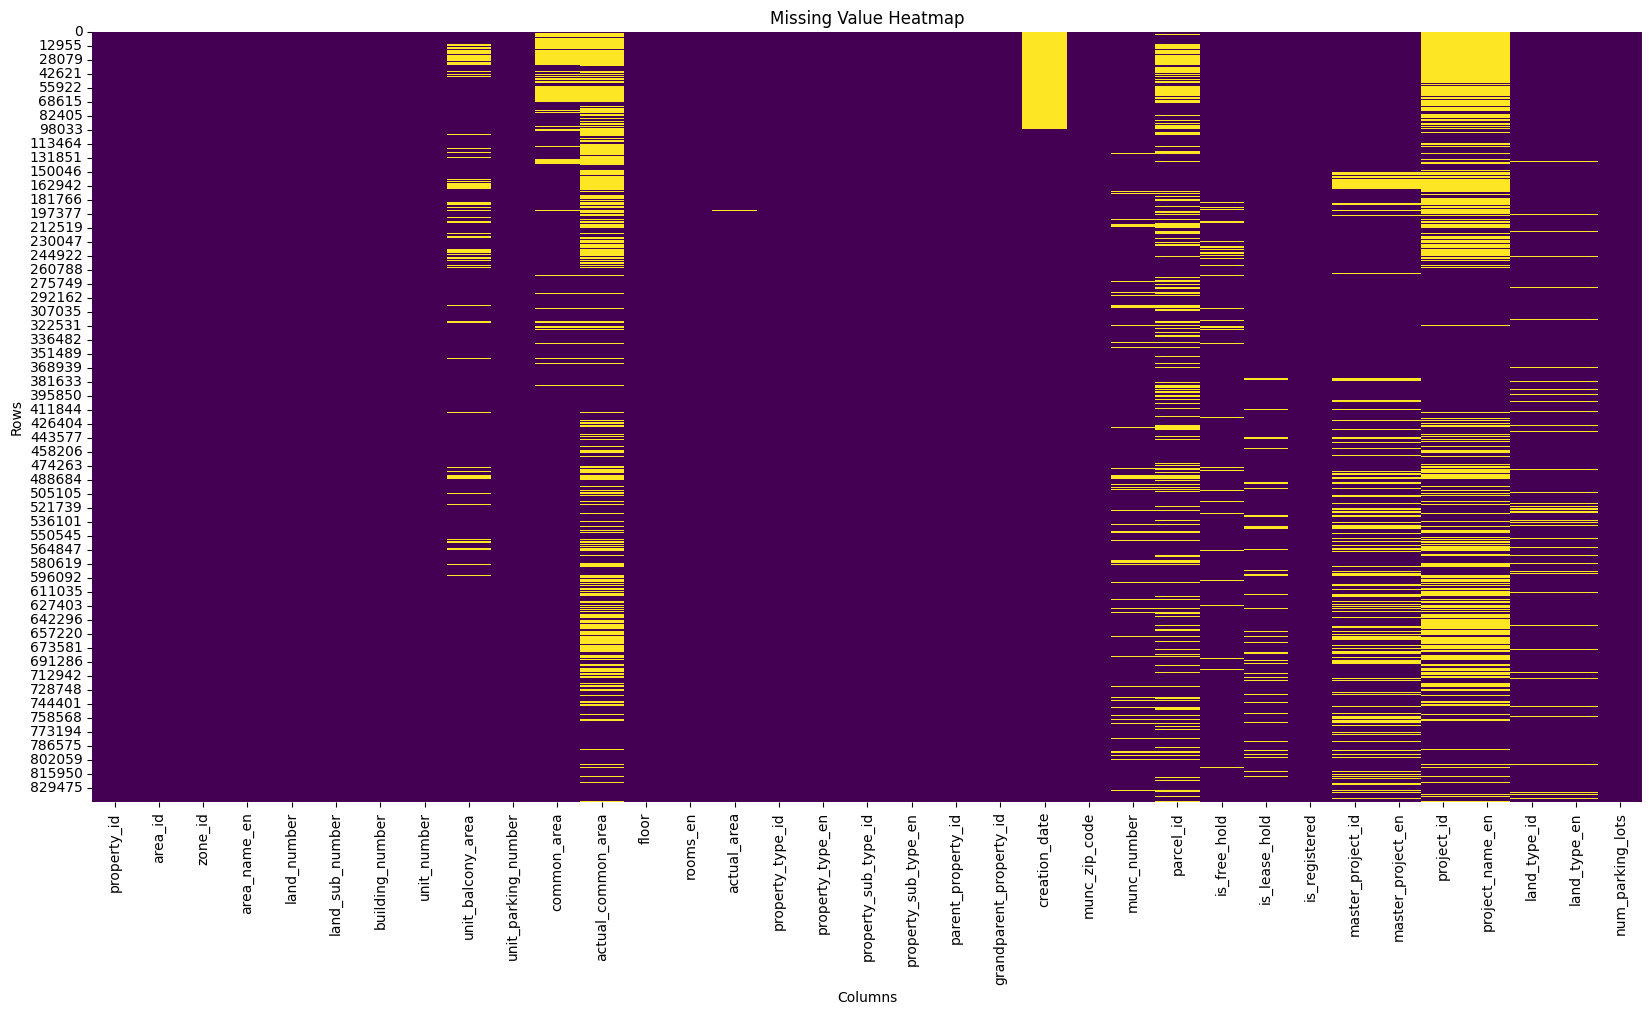

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your DataFrame
# df = pd.read_csv('data/Land_Registry.csv')

# Initialize plot
plt.figure(figsize=(20, 10))

# Create a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

# Add title and labels
plt.title('Missing Value Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Show the plot
plt.show()


## Cleaning the actual_area


count    690838.000000
mean         91.498918
std         263.590567
min           0.000000
25%          46.150000
50%          76.140000
75%         111.360000
max      185878.000000
Name: actual_area, dtype: float64
Missing values: 176
Unique values: [191.84 126.28 231.48 ... 256.5  258.44 268.05]


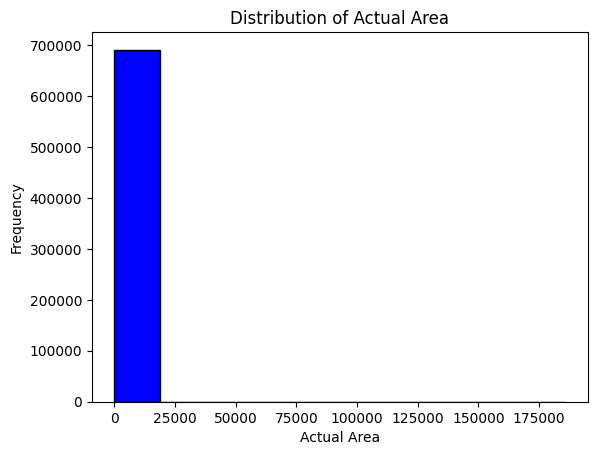

In [30]:
import pandas as pd

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')

# Basic statistics of the 'actual_area' column
print(df['actual_area'].describe())

# Check for missing values in the 'actual_area' column
missing_values_count = df['actual_area'].isna().sum()
print(f"Missing values: {missing_values_count}")

# Check unique values
unique_values = df['actual_area'].unique()
print(f"Unique values: {unique_values}")


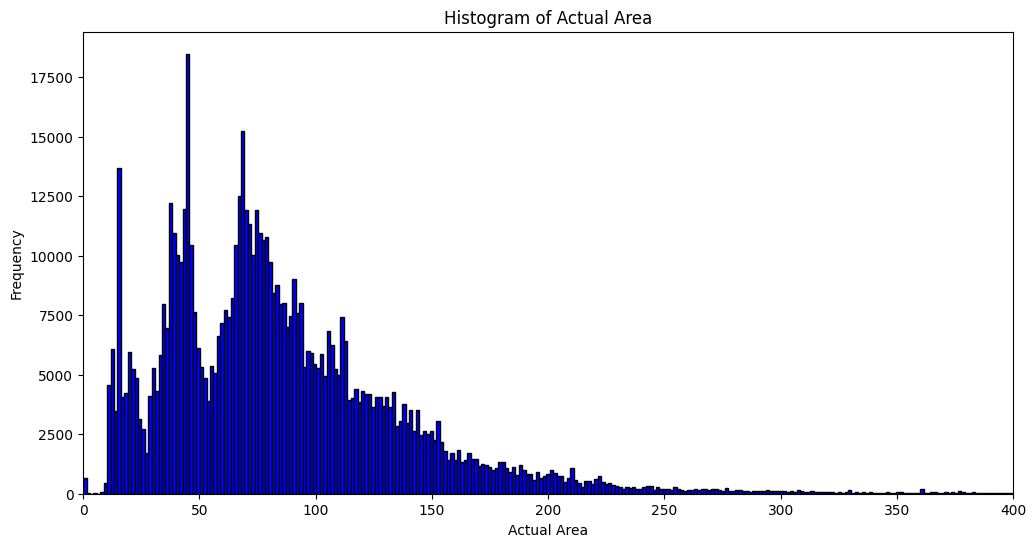

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')

# Create the histogram
plt.figure(figsize=(12, 6))
plt.hist(df['actual_area'], bins='auto', color='blue', edgecolor='black')
plt.xlim(0, 400)
plt.title('Histogram of Actual Area')
plt.xlabel('Actual Area')
plt.ylabel('Frequency')
plt.show()


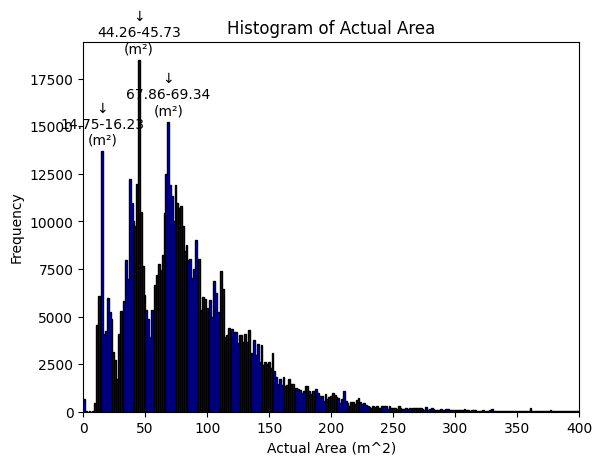

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')

# Calculate the histogram data
n, bins, patches = plt.hist(df['actual_area'], bins='auto', color='blue', edgecolor='black')
plt.xlim(0, 400)
plt.title('Histogram of Actual Area')
plt.xlabel('Actual Area (m^2)')
plt.ylabel('Frequency')

# Highlight bins with frequency greater than 12500 with actual area size
threshold = 12500
for i in range(len(n)):
    if n[i] > threshold:
        area_start = bins[i]
        area_end = bins[i+1]
        plt.annotate(f"\u2193\n{area_start:.2f}-{area_end:.2f}\n(m²)", 
                     (bins[i]+(bins[i+1]-bins[i])/2, n[i]), 
                     textcoords="offset points", xytext=(0,5), ha='center')

# Show the plot
plt.show()


In [45]:
# Remove rows where 'actual_area' is NaN or 0
df = df[df['actual_area'].notna()]  # Remove rows with NaN
df = df[df['actual_area'] != 0]     # Remove rows with 0
# remove rows where 'actual_area' is greater than 1000
df = df[df['actual_area'] < 1000]

## Cleaning the unit_balcony_area

In [46]:
# Basic statistics of the 'actual_area' column
print(df['unit_balcony_area'].describe())

# Check for missing values in the 'actual_area' column
missing_values_count = df['unit_balcony_area'].isna().sum()
print(f"Missing values: {missing_values_count}")

# Check unique values
unique_values = df['unit_balcony_area'].unique()
print(f"Unique values: {unique_values}")

# 99th percentile of 'unit_balcony_area'
percentile_99 = df['unit_balcony_area'].quantile(0.99)
print(f"99th percentile: {percentile_99}")

count    620956.000000
mean         11.525639
std          29.939437
min          -1.000000
25%           3.990000
50%           7.030000
75%          13.180000
max       18313.380000
Name: unit_balcony_area, dtype: float64
Missing values: 68419
Unique values: [19.97 13.22 96.2  ... 73.25 49.48 53.59]
99th percentile: 85.41899999999907


In [47]:
# Assign missing values to 0
df['unit_balcony_area'].fillna(0, inplace=True)

# Assign negative values to 0
df.loc[df['unit_balcony_area'] < 0, 'unit_balcony_area'] = 0

# Remove rows with values above 105
df = df[df['unit_balcony_area'] <= 105]

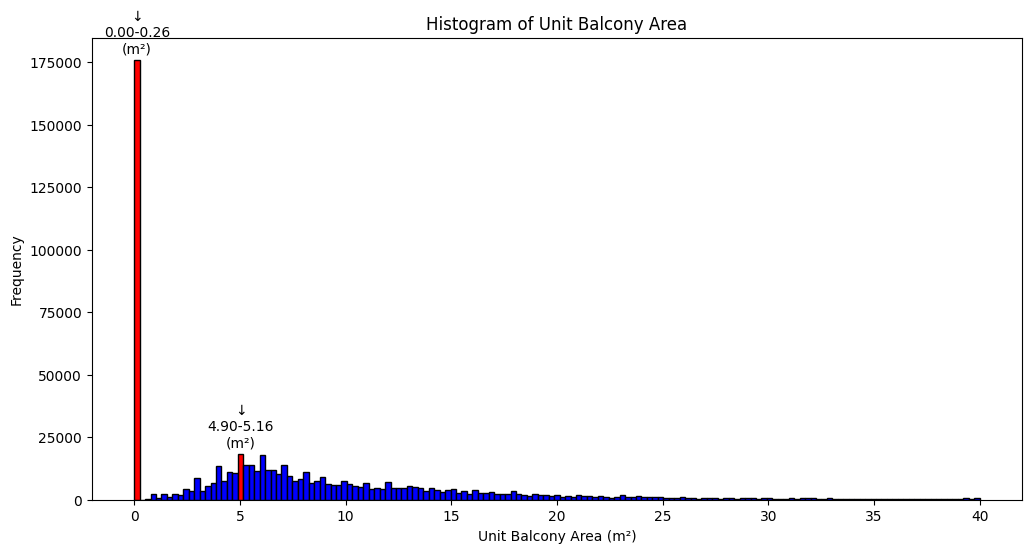

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')

# Create the histogram and get bin and frequency information
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(df['unit_balcony_area'], bins='auto', range=(0, 40), color='blue', edgecolor='black')
plt.title('Histogram of Unit Balcony Area')
plt.xlabel('Unit Balcony Area (m²)')
plt.ylabel('Frequency')

# Get the indices of the top 2 frequencies and highlight them
top_two_indices = np.argsort(n)[-2:]
for i in top_two_indices:
    area_start = bins[i]
    area_end = bins[i+1]
    plt.annotate(f"\u2193\n{area_start:.2f}-{area_end:.2f}\n(m²)", 
                 (bins[i] + (bins[i+1] - bins[i]) / 2, n[i]), 
                 textcoords="offset points", xytext=(0,5), ha='center')
    patches[i].set_facecolor('red')

# Show the plot
plt.show()


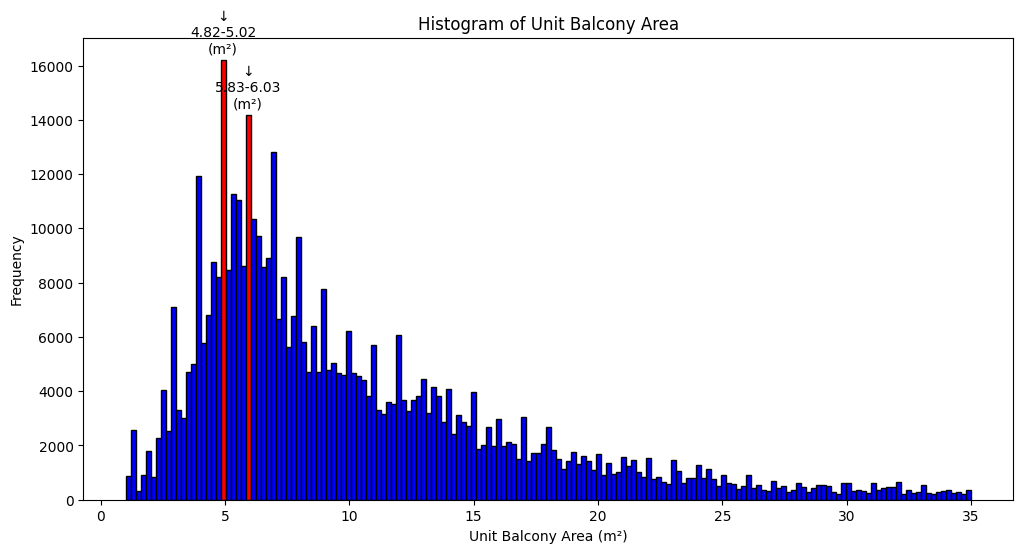

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')

# Create the histogram and get bin and frequency information
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(df['unit_balcony_area'], bins='auto', range=(1, 35), color='blue', edgecolor='black')
plt.title('Histogram of Unit Balcony Area')
plt.xlabel('Unit Balcony Area (m²)')
plt.ylabel('Frequency')

# Get the indices of the top 2 frequencies and highlight them
top_two_indices = np.argsort(n)[-2:]
for i in top_two_indices:
    area_start = bins[i]
    area_end = bins[i+1]
    plt.annotate(f"\u2193\n{area_start:.2f}-{area_end:.2f}\n(m²)", 
                 (bins[i] + (bins[i+1] - bins[i]) / 2, n[i]), 
                 textcoords="offset points", xytext=(0,5), ha='center')
    patches[i].set_facecolor('red')

# Show the plot
plt.show()


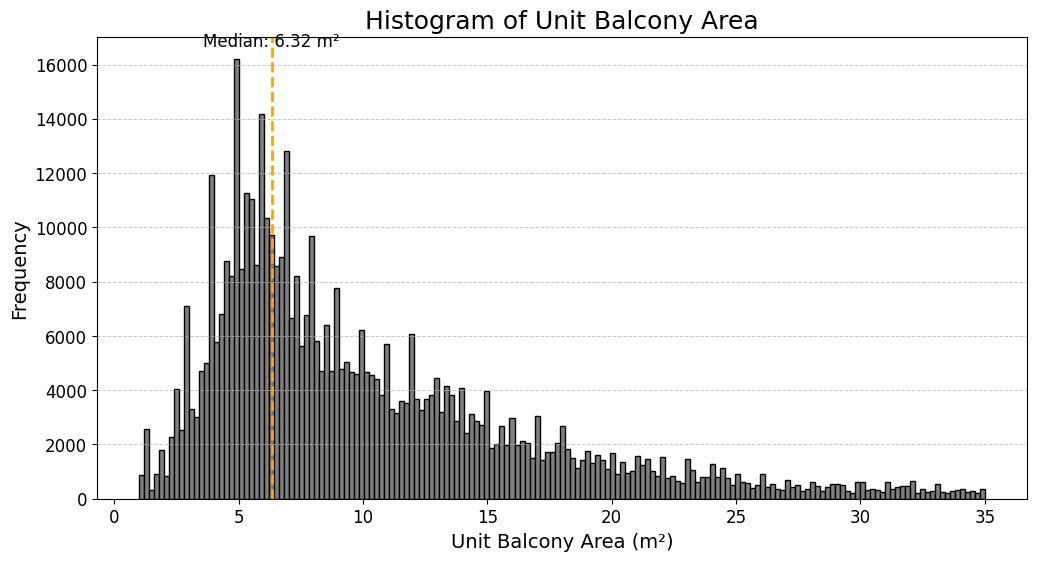

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')

# Calculate the median
median_val = df['unit_balcony_area'].median()

# Create the histogram and get bin and frequency information
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(df['unit_balcony_area'], bins='auto', range=(1, 35), color='grey', edgecolor='black')
plt.title('Histogram of Unit Balcony Area', fontsize=18)
plt.xlabel('Unit Balcony Area (m²)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Highlight the median with a vertical line
plt.axvline(median_val, color='orange', linestyle='--', linewidth=2)
plt.annotate(f'Median: {median_val:.2f} m²', (median_val, max(n) - 50), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12)

# Aesthetic tweaks
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


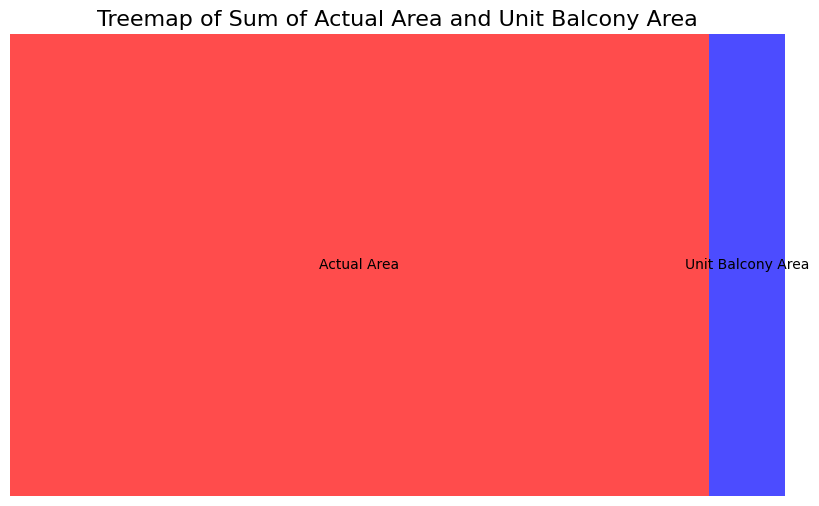

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import squarify

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')

# Calculate the sum of 'actual_area' and 'unit_balcony_area'
sum_actual_area = df['actual_area'].sum()
sum_unit_balcony_area = df['unit_balcony_area'].sum()

# Create a data frame for the sums
sums_df = pd.DataFrame({'Area_Type': ['Actual Area', 'Unit Balcony Area'],
                        'Sum': [sum_actual_area, sum_unit_balcony_area]})

# Plotting the treemap
plt.figure(figsize=(10, 6))
colors = ['red', 'blue']
squarify.plot(sizes=sums_df['Sum'], label=sums_df['Area_Type'], color=colors, alpha=0.7)

# Adding labels and title
plt.title("Treemap of Sum of Actual Area and Unit Balcony Area", fontsize=16)
plt.axis('off')

# Show the plot
plt.show()


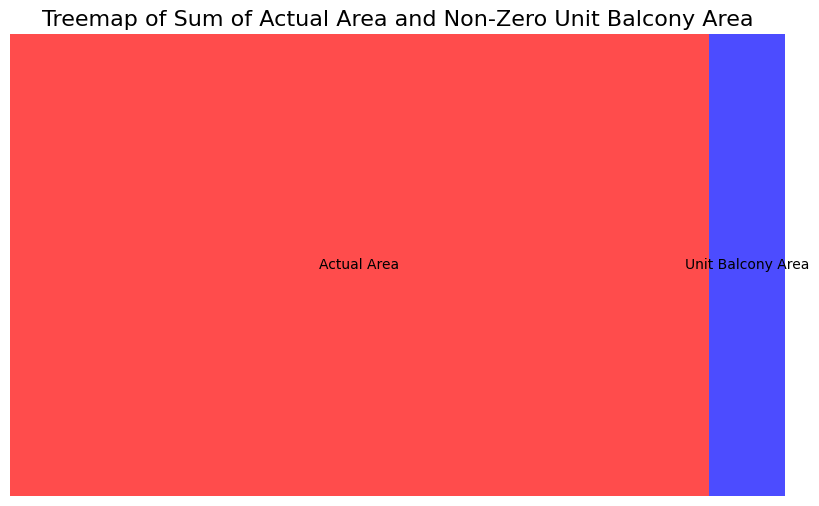

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import squarify

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')

# Filter out rows where 'unit_balcony_area' is 0
filtered_df = df[df['unit_balcony_area'] != 0]

# Calculate the sum of 'actual_area' and 'unit_balcony_area'
sum_actual_area = df['actual_area'].sum()
sum_unit_balcony_area = filtered_df['unit_balcony_area'].sum()

# Create a DataFrame for the sums
sums_df = pd.DataFrame({'Area_Type': ['Actual Area', 'Unit Balcony Area'],
                        'Sum': [sum_actual_area, sum_unit_balcony_area]})

# Plotting the treemap
plt.figure(figsize=(10, 6))
colors = ['red', 'blue']
squarify.plot(sizes=sums_df['Sum'], label=sums_df['Area_Type'], color=colors, alpha=0.7)

# Adding labels and title
plt.title("Treemap of Sum of Actual Area and Non-Zero Unit Balcony Area", fontsize=16)
plt.axis('off')

# Show the plot
plt.show()


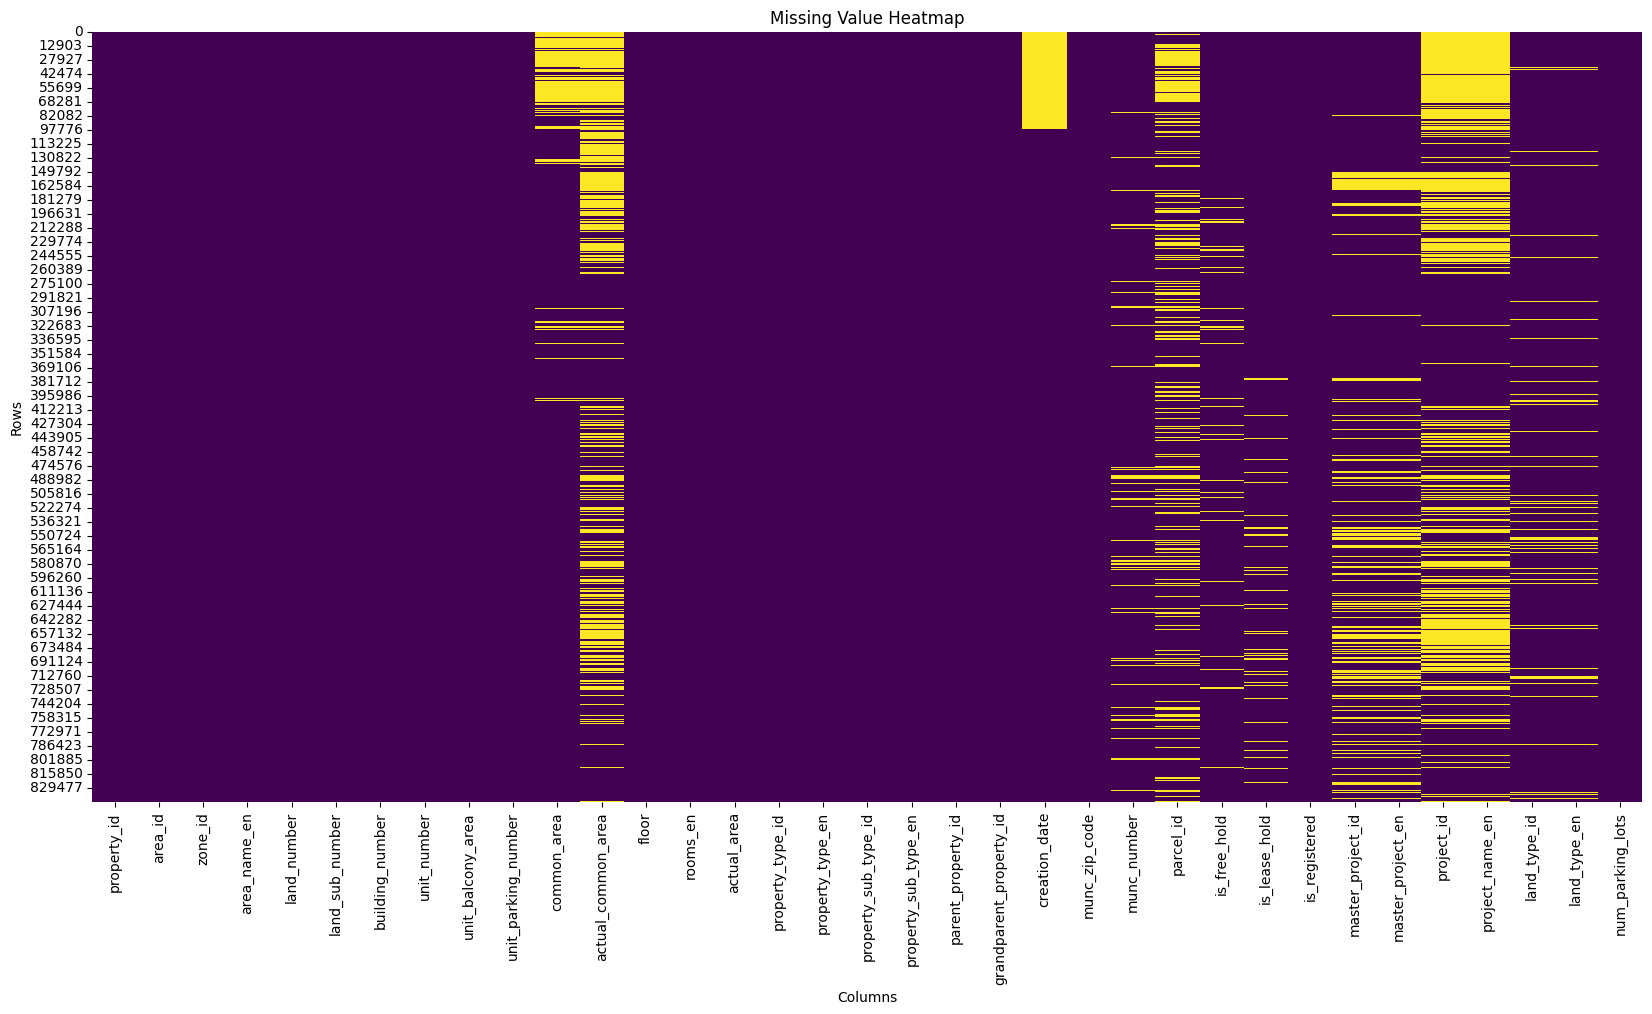

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your DataFrame
# df = pd.read_csv('data/Land_Registry.csv')

# Initialize plot
plt.figure(figsize=(20, 10))

# Create a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

# Add title and labels
plt.title('Missing Value Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Show the plot
plt.show()
